# Title

### Image

### Story

# Dependencies

In [17]:
# Standard 
import numpy as np
import pandas as pd

# Visualize
import matplotlib.pyplot as plt
import seaborn as sns

# Functions

In [18]:
def RemoveOutliers(df):
    df_copy = df.copy()
    cols = df_copy.columns.to_list()
    for i in cols:
        q1 = np.quantile(df_copy[i], 0.25)
        q3 = np.quantile(df_copy[i], 0.75)

        iqr = q3 - q1

        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr

        df_copy = df_copy[(df_copy[i] > lower) & (df_copy[i] < upper)]
    
    print(f'Removed {df.shape[0] - df_copy.shape[0]} outliers from data')
    
    return df_copy

# Load data

In [19]:
# Load csv-file and display 5 first rows
raw_data = pd.read_csv("diabetes.csv")
raw_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Shape

In [20]:
print(raw_data.shape)

(768, 9)


# Information

In [21]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Missing data

In [22]:
raw_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Descriptive statistics

In [23]:
raw_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Exploratory data analysis

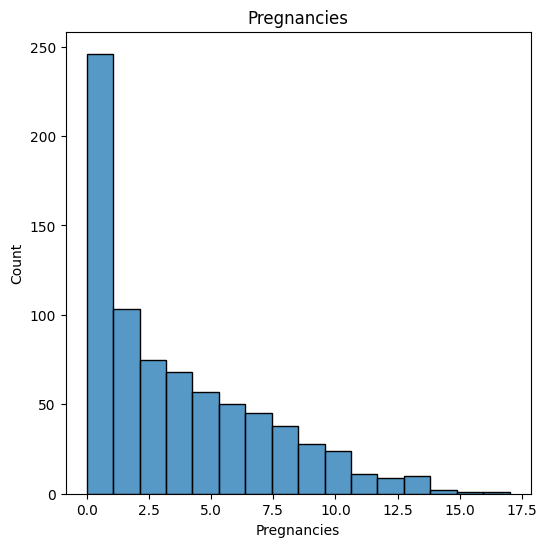

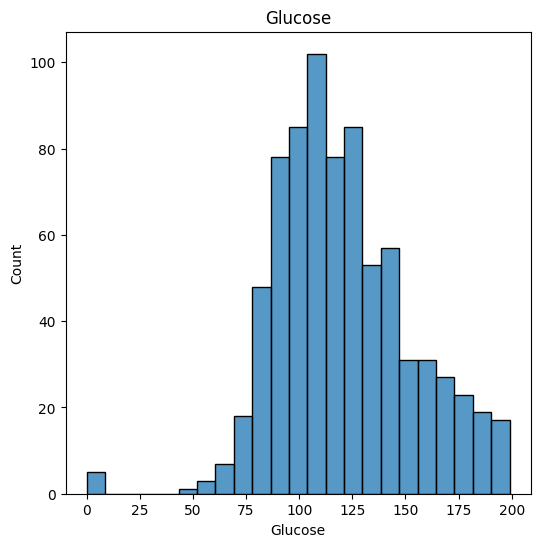

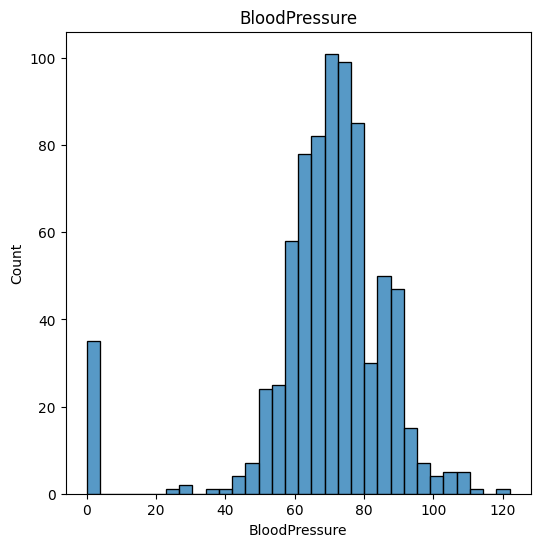

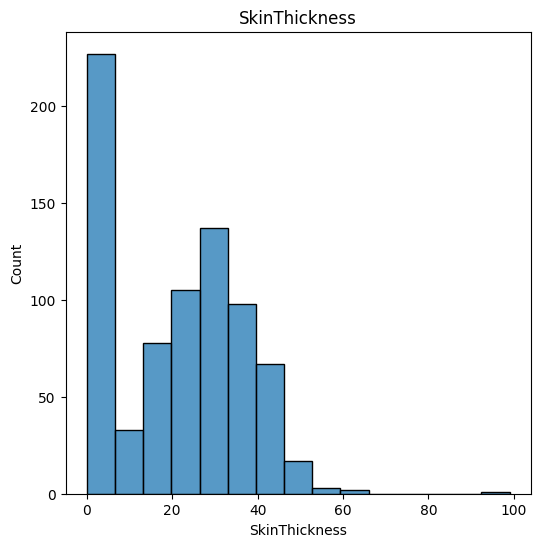

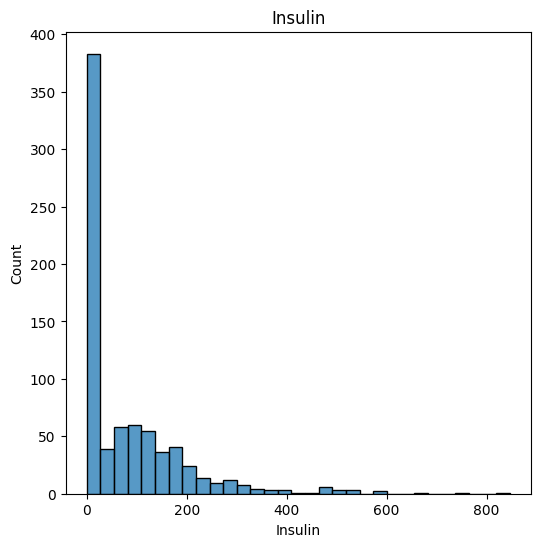

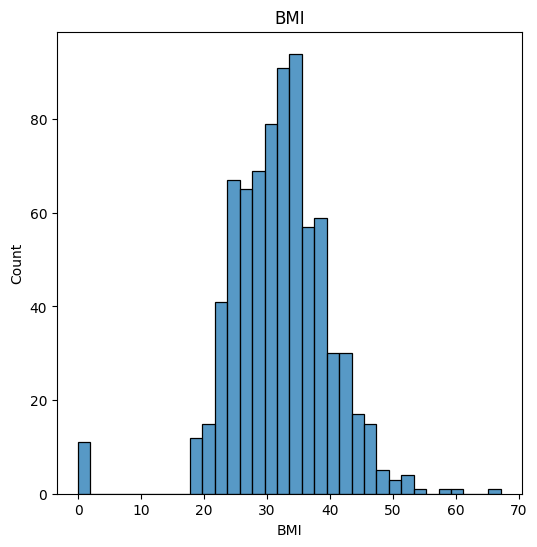

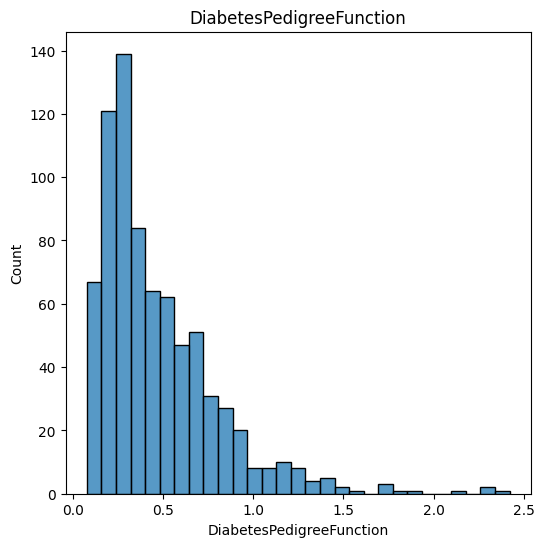

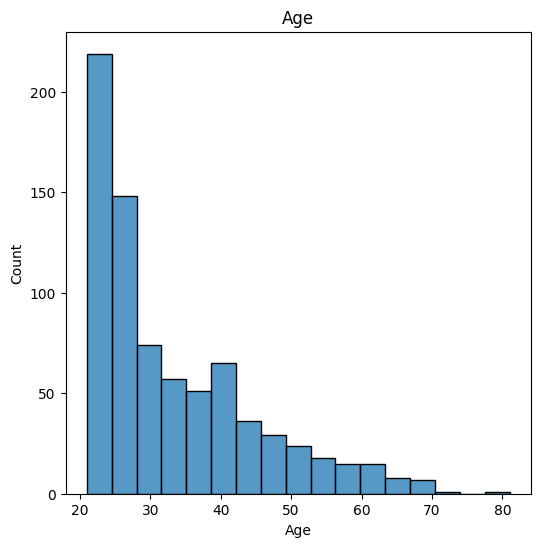

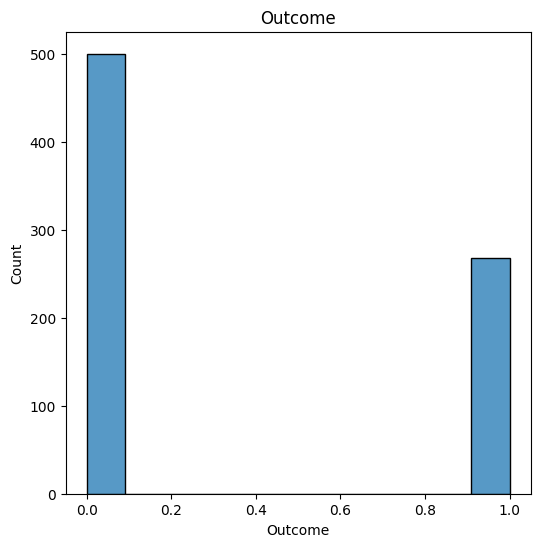

In [24]:
for i in raw_data.columns.to_list():
    fig, ax = plt.subplots(figsize = (6, 6))
    sns.histplot(data = raw_data, x = i)
    plt.title(f'{i}')
    plt.show()

# Remove outliers

In [25]:
data = RemoveOutliers(raw_data)

Removed 132 outliers from data


# Descriptive analysis of updated data

In [26]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000
mean,3.786164,118.836478,72.014151,20.778302,68.844340,31.994969,0.425346,32.567610,0.311321
std,3.251388,28.981205,11.310010,15.274483,83.173773,6.422311,0.244421,10.873365,0.463398
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.300000,0.238750,24.000000,0.000000
50%,3.000000,114.000000,72.000000,23.000000,42.500000,32.000000,0.359500,29.000000,0.000000
75%,6.000000,136.000000,80.000000,32.000000,122.000000,36.025000,0.583000,40.000000,1.000000
max,13.000000,198.000000,106.000000,60.000000,328.000000,49.700000,1.162000,65.000000,1.000000


# Check data types

In [27]:
data["Outcome"] = data["Outcome"].astype("category")

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 636 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               636 non-null    int64   
 1   Glucose                   636 non-null    int64   
 2   BloodPressure             636 non-null    int64   
 3   SkinThickness             636 non-null    int64   
 4   Insulin                   636 non-null    int64   
 5   BMI                       636 non-null    float64 
 6   DiabetesPedigreeFunction  636 non-null    float64 
 7   Age                       636 non-null    int64   
 8   Outcome                   636 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 45.5 KB


# Exploratory data analysis of data without outliers

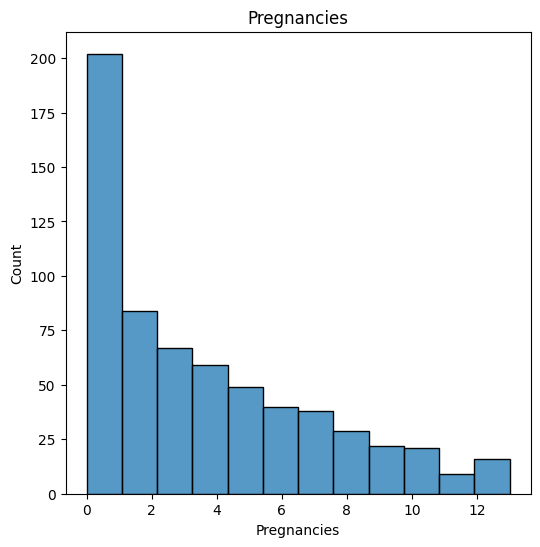

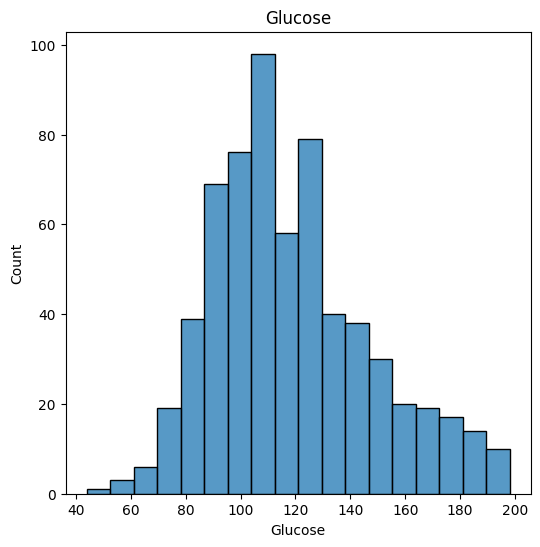

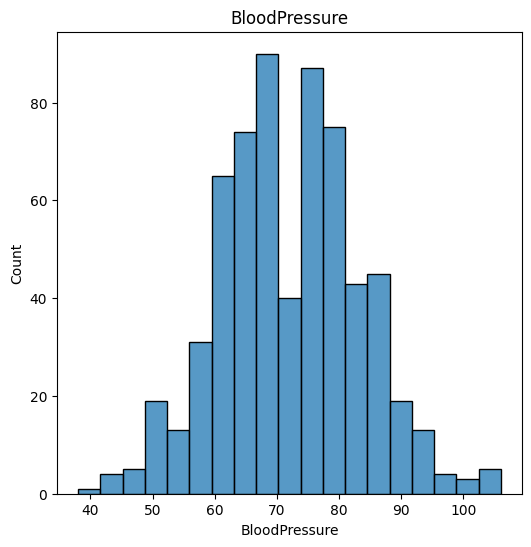

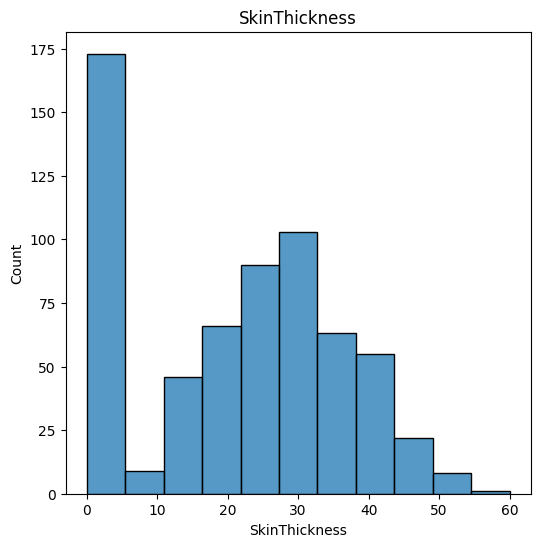

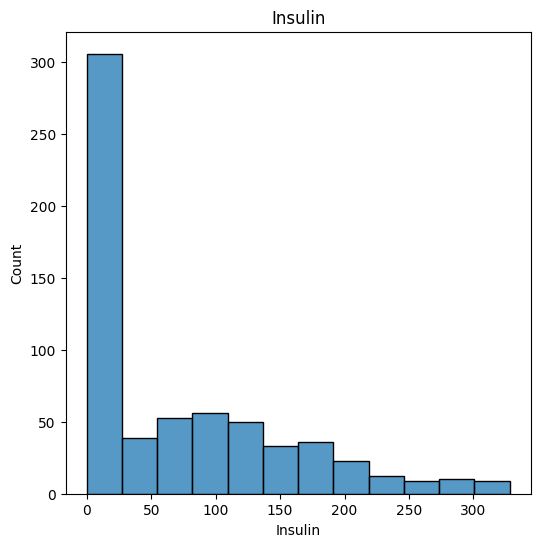

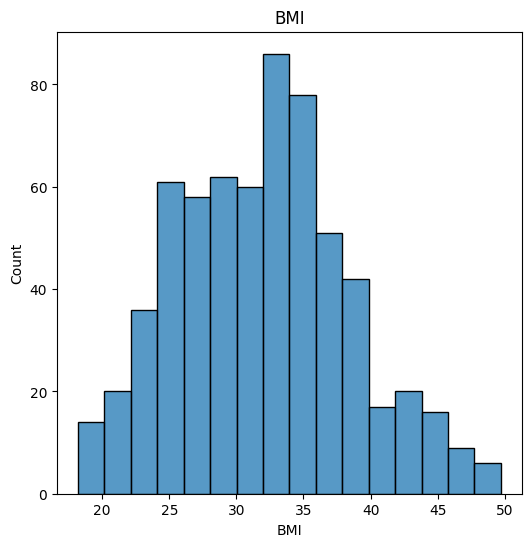

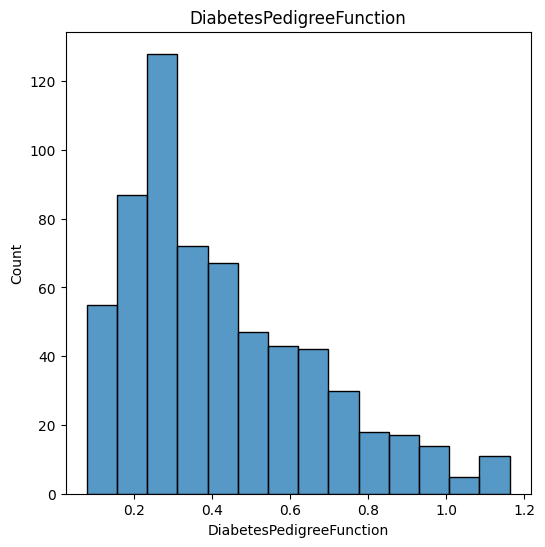

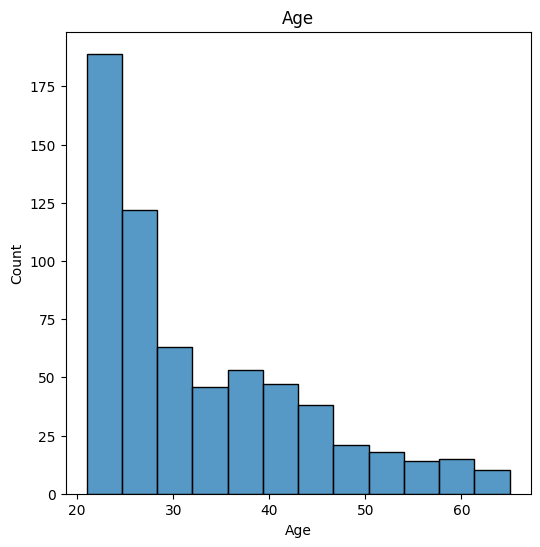

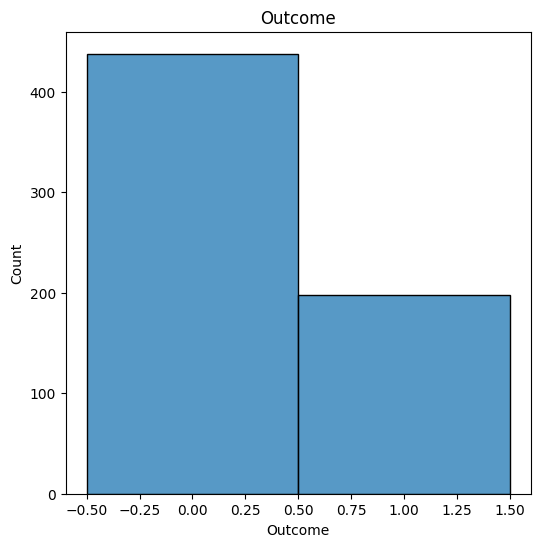

In [29]:
for i in data.columns.to_list():
    fig, ax = plt.subplots(figsize = (6, 6))
    sns.histplot(data = data, x = i)
    plt.title(f'{i}')
    plt.show()

# Save data without outliers as csv-file

In [30]:
pd.DataFrame.to_csv(data, "clean.csv", sep = ",")